#  Analytical representation of 30 mins intraday stock data from 1998 to 2015

_For this project on analyzing 30 mins intraday stock data, I will present descriptive statistics for a bunch of dataset (and my "ultimate" plan is to make a model which will be trained by these datasets and will be tested by other available datasets.)_ 

## 1. Importing library packages

For analyzing the dataset, I'll be importing couple of python libraries namely **numpy**, which is essential to manipulate large, multidimensional matrices and arrays, **matplotlib**, which will be useful to plot all the prices and other features' value and then **pandas** which is an acclaimed python library for data analysis.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## 2. Conversion of .txt file into .csv file and read that in dataframe

To facilitate the analysis I'm converting **.txt** file into **.csv** file at this point. 

In [46]:
df=pd.read_csv("AA.csv");  #Loading the .csv file on dataframe df

#df=pd.read_csv("AA.csv", names=['Date', 'Time', 'Closing Price', 'Highest price','Lowest price','Opening price','Volume'])#another way to name the features


## 3. Working in dataframe

In [47]:

df.columns = ['Date', 'Time', 'Closing Price', 'Highest price','Lowest price','Opening price','Volume'];# Adding columns' title 

df.head(10) # showing top 10 rows on each execution

,Date,Time,Closing Price,Highest price,Lowest price,Opening price,Volume
0,01/02/1998,10:00,13.072,13.130,13.061,13.130,420554
1,01/02/1998,10:30,13.118,13.130,13.107,13.118,272411
2,01/02/1998,11:00,13.118,13.153,13.107,13.153,315824
3,01/02/1998,11:30,13.153,13.199,13.118,13.118,149775
4,01/02/1998,12:00,13.118,13.165,13.118,13.165,115044
5,01/02/1998,12:30,13.153,13.165,13.130,13.153,160083
6,01/02/1998,13:00,13.165,13.165,13.142,13.153,56438
7,01/02/1998,13:30,13.153,13.153,13.095,13.130,97679
8,01/02/1998,14:00,13.130,13.165,13.107,13.142,109075
9,01/02/1998,14:30,13.142,13.142,13.084,13.084,126983


In [48]:
df.shape # it would give number of rows and columns

(84347, 7)

In [49]:
df.iloc[5,:] #iloc” in pandas is used to select rows and columns by number

Date             01/02/1998
Time                  12:30
Closing Price        13.153
Highest price        13.165
Lowest price          13.13
Opening price        13.153
Volume               160083
Name: 5, dtype: object

## 3. Statistical description of data

In [50]:
df.describe() #calling Pandas describe () method which is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

,Closing Price,Highest price,Lowest price,Opening price,Volume
count,84347.000000,84347.000000,84347.000000,84347.000000,8.434700e+04
mean,18.460757,18.522249,18.397176,18.459780,7.343793e+05
std,8.349751,8.378110,8.320101,8.348991,1.200385e+06
min,4.702900,4.731000,4.665300,4.702500,1.000000e+02
25%,10.900000,10.940000,10.856000,10.900000,3.352100e+04
50%,16.030000,16.081000,15.987000,16.030000,3.340590e+05
75%,25.800000,25.880000,25.700000,25.800000,8.871270e+05
max,42.790000,43.160000,42.610000,42.740000,5.319936e+07


## 4. Visualization of data with respect of time

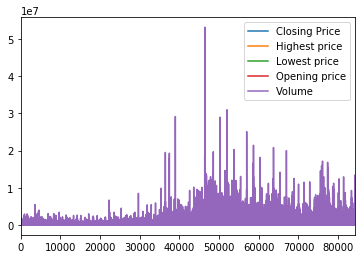

In [51]:
data1 = df.loc[:,['Time', 'Closing Price', 'Highest price','Lowest price','Opening price','Volume']]
data1.plot() #.loc to access the rows and columns by labelling them and plot them consequently 

In [55]:
df['datetime']= pd.to_datetime (df['Date'])
df=df.set_index('datetime')
df.head(10)

,Date,Time,Closing Price,Highest price,Lowest price,Opening price,Volume
datetime,,,,,,,
1998-01-02,01/02/1998,10:00,13.072,13.130,13.061,13.130,420554
1998-01-02,01/02/1998,10:30,13.118,13.130,13.107,13.118,272411
1998-01-02,01/02/1998,11:00,13.118,13.153,13.107,13.153,315824
1998-01-02,01/02/1998,11:30,13.153,13.199,13.118,13.118,149775
1998-01-02,01/02/1998,12:00,13.118,13.165,13.118,13.165,115044
1998-01-02,01/02/1998,12:30,13.153,13.165,13.130,13.153,160083
1998-01-02,01/02/1998,13:00,13.165,13.165,13.142,13.153,56438
1998-01-02,01/02/1998,13:30,13.153,13.153,13.095,13.130,97679
1998-01-02,01/02/1998,14:00,13.130,13.165,13.107,13.142,109075


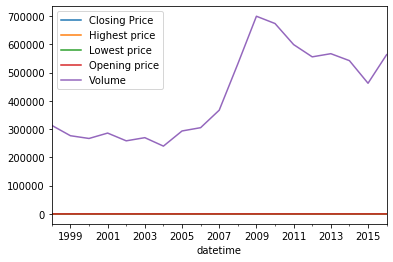

datetime
1998-01-02    10:00
1998-01-02    10:30
1998-01-02    11:00
1998-01-02    11:30
1998-01-02    12:00
1998-01-02    12:30
1998-01-02    13:00
1998-01-02    13:30
1998-01-02    14:00
1998-01-02    14:30
1998-01-02    15:00
1998-01-02    15:30
1998-01-02    16:00
Name: Time, dtype: object

In [60]:
df.resample('12M').median().plot()
plt.show()
df.loc['1998-01-02', 'Time']

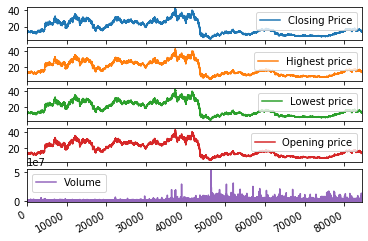

In [57]:
data1.plot(subplots = True) #each series in a dataframe can be plotted on a different axis with the "subplots"
plt.show()

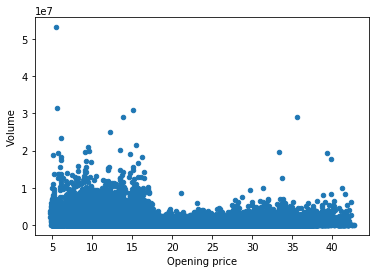

In [58]:
data1.plot(kind = "scatter",x="Opening price",y = "Volume")
plt.show()  #visual correlation plot between 2 variables/features (opening price & volume here,we can do the same for other variables) by using scatter plot matrix 

In [17]:
df [['Closing Price']].idxmax()

Closing Price    37397
dtype: int64

In [19]:
df.iloc[37397,1]

'08:30'

In [20]:
df.iloc [37397,0] #to determine from when the abrupt drop started

'07/16/2007'

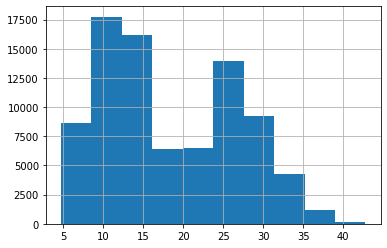

In [22]:
df['Closing Price'].hist ()

# Summary